### Imports

In [87]:
import numpy as np
import matplotlib.pyplot as plt



### Combinacion Linear de Senos

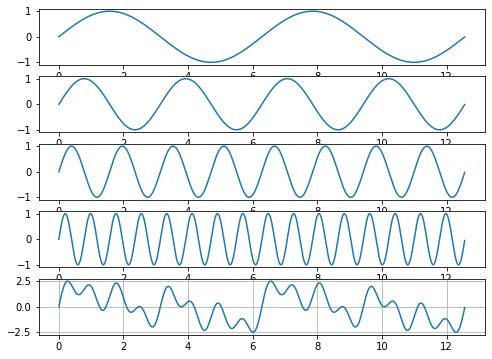

In [88]:
T = np.arange(0, 4 * np.pi, 0.01)
A1 =  np.sin(T)
A2 =  np.sin(2 * T)
A3 =  np.sin(4 * T)
A4 =  np.sin(8 * T)
A5 = A1 + A2 + A3 + A4

fig, axs = plt.subplots(5, 1, figsize=(8,6))
plt.grid()
axs[0].plot(T, A1)
axs[1].plot(T, A2)
axs[2].plot(T, A3)
axs[3].plot(T, A4)
axs[4].plot(T, A5)

### DFT basic algorithm


In [89]:
def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

In [90]:
x = np.random.rand(1000)
dft = DFT(x)

### Exploring the FFT

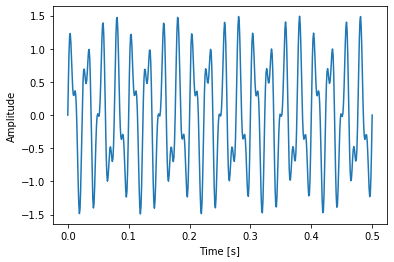

In [91]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [92]:
fft = np.fft.fft(s)

for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]))
    print("Value at index {}:\t{}".format(fft.size - 1 - i, fft[- 1 - i]))

Value at index 0:	(0.0003804834928392009-0.0605550317619008j)
Value at index 499:	(0.00038048349284042216+0.0605550317619024j)
Value at index 1:	(0.001531771483137212-0.1218880852806952j)
Value at index 498:	(0.0015317714831376839+0.12188808528069531j)


#### Como podemos observar en el ejemplo anterior los valores de la fft en la posicion i-esima es la conjugada de la posicion N - i - 1

#### Ahora pasaremos a mostrar el espectro de frecuencia



$\sum_{n=0}^{10} t_i$

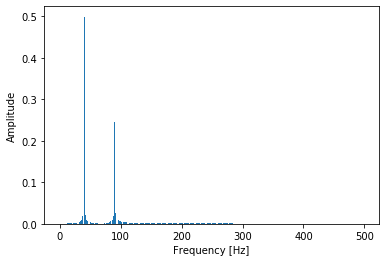

In [94]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()